In [222]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random
import numpy as np
import math
import seaborn as sns
import statsmodels.api as sm
random.seed(123)
np.random.seed(123)

In [223]:
df1 = pd.read_csv('../data/books_25_pages_clean0.csv',skipinitialspace=True)
df1.head()

,avg_rating,num_ratings,year_published,book_review_count,author_num_unique_books,kindle_price,genre_20th-century,genre_21st-century,genre_abuse,genre_academic,...,genre_personal-development_percent,genre_philosophy_percent,genre_productivity_percent,genre_psychology_percent,genre_relationships_percent,genre_science_percent,genre_self-help_percent,genre_spirituality_percent,ratings_per_month_since_published,reviews_per_month_since_published
0,3.86,8980,2001.0,608.0,20.0,12.99,0,0,0,0,...,0.072954,0.000000,0.000000,0.017794,0.0,0.0,0.110320,0.0,39.385965,2.666667
1,4.24,3752,2015.0,441.0,4.0,11.99,0,0,0,0,...,0.013410,0.291188,0.000000,0.028736,0.0,0.0,0.091954,0.0,62.533333,7.350000
2,3.70,2570,2013.0,362.0,13.0,8.26,0,0,0,0,...,0.067416,0.000000,0.000000,0.101124,0.0,0.0,0.243446,0.0,30.595238,4.309524
3,3.75,5161,2010.0,776.0,15.0,11.99,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.094697,0.0,43.008333,6.466667
4,3.90,5484,1998.0,300.0,12.0,11.99,0,0,0,0,...,0.062201,0.000000,0.086124,0.026316,0.0,0.0,0.311005,0.0,20.772727,1.136364


In [224]:
# create training and testing dataframes
num_half = int(len(df1.index)/2)
print(num_half)
df_train = df1.sample(frac=1).head(n=num_half)
df_validate = df1.sample(frac=1).tail(n=len(df1.index)-num_half)

94


In [225]:
# select predictors
features = ['kindle_price','author_num_unique_books','genre_audiobook_percent','genre_business_percent','genre_mental-health_percent','genre_personal-development_percent','genre_philosophy_percent','genre_productivity_percent','genre_psychology_percent','genre_science_percent','genre_spirituality_percent','genre_self-help_percent']
# features.extend(list(df1.columns[250:-2]))

len(features)
# for i in range(0,len(list(df1.columns))):
#     print(i,list(df1.columns)[i])


12

<AxesSubplot:>

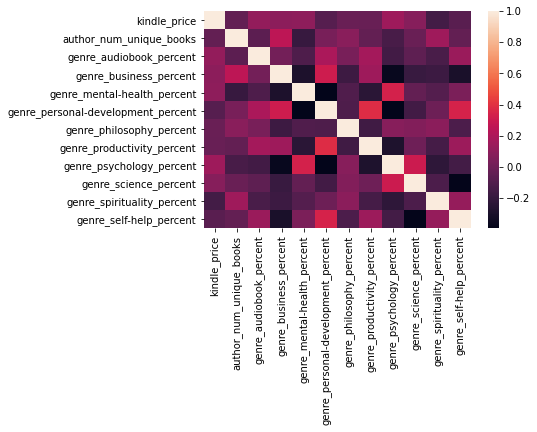

In [226]:

sns.heatmap(df_train[features].corr(), annot=False)


In [227]:
# build linear regression model
X_train = df_train[features]
y_train = df_train['reviews_per_month_since_published']
X_validate = df_validate[features]
y_validate = df_validate['reviews_per_month_since_published']
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred_validate = regr.predict(X_validate)
print('rmse validation',math.sqrt(mean_squared_error(y_validate, y_pred_validate)))
print('rsq validation',r2_score(y_validate, y_pred_validate))
print('rmse training',math.sqrt(mean_squared_error(y_train, regr.predict(X_train))))
print('rsq training',r2_score(y_train, regr.predict(X_train)))

rmse validation 2.6587759475898465
rsq validation 0.13885377653542008
rmse training 2.153284480893285
rsq training 0.43529499143982275


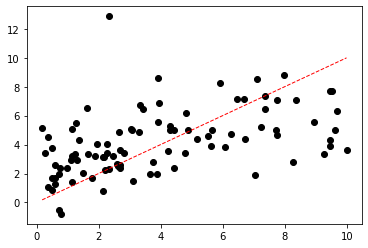

In [228]:
plt.scatter(y_validate,y_pred_validate,  color='black')
# plt.plot(X_validate, y_pred_validate, color='blue', linewidth=3)
plt.plot(sorted(y_validate,key=float), sorted(y_validate,key=float),'--', linewidth=1,color='red')
# plt.xticks(())
# plt.yticks(())

plt.show()


In [229]:
regr.intercept_
regr.coef_

array([  0.11150305,  -0.03803404,  11.58770336,  -6.47818551,
        -0.1231117 ,   2.51343614,   0.77168465,  -2.33395358,
        -9.17868291,  29.43934005,  -6.56523052, -16.3019454 ])

In [230]:
ols = sm.OLS(y_train,X_train)
ols_result = ols.fit()
ols_result.summary()

# from statsmodels.graphics.regressionplots import plot_leverage_resid2
# fig, ax = plt.subplots(figsize=(8,6))
# fig = plot_leverage_resid2(ols_result, ax = ax)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     reviews_per_month_since_published   R-squared (uncentered):                   0.718
Model:                                           OLS   Adj. R-squared (uncentered):              0.677
Method:                                Least Squares   F-statistic:                              17.40
Date:                               Fri, 25 Sep 2020   Prob (F-statistic):                    7.89e-18
Time:                                       08:27:56   Log-Likelihood:                         -222.11
No. Observations:                                 94   AIC:                                      468.2
Df Residuals:                                     82   BIC:                                      498.7
Df Model:                                         12                                                  
Covariance Type:                           nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
kindle_price                           0.3783      0.081      4.664      0.000       0.217       0.540
author_num_unique_books                0.0135      0.043      0.315      0.754      -0.072       0.099
genre_audiobook_percent               14.9501     16.098      0.929      0.356     -17.074      46.974
genre_business_percent                -0.7320      3.605     -0.203      0.840      -7.904       6.440
genre_mental-health_percent            8.4579     12.030      0.703      0.484     -15.474      32.390
genre_personal-development_percent     7.3532      9.985      0.736      0.464     -12.510      27.217
genre_philosophy_percent               8.5266      9.286      0.918      0.361      -9.945      26.999
genre_productivity_percent             0.2651      7.310      0.036      0.971     -14.277      14.807
genre_psychology_percent              -5.1013      2.820     -1.809      0.074     -10.712       0.510
genre_science_percent                 47.9504     13.730      3.492      0.001      20.638      75.263
genre_spirituality_percent            -2.0796      4.622     -0.450      0.654     -11.275       7.116
genre_self-help_percent               -5.2345      3.852     -1.359      0.178     -12.897       2.428
==============================================================================
Omnibus:                       14.876   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.462
Skew:                           0.938   Prob(JB):                     0.000266
Kurtosis:                       3.825   Cond. No.                         956.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
df_coeff = pd.DataFrame(ols_result.params) #.reset_index()
# df_coeff = df_coeff.rename(columns={0:'value','index':'coefficient'})
df_coeff.sort_values(by=[0],ascending=False)

,0
genre_science_percent,47.950358
genre_audiobook_percent,14.950130
genre_philosophy_percent,8.526569
genre_mental-health_percent,8.457874
genre_personal-development_percent,7.353178
kindle_price,0.378293
genre_productivity_percent,0.265070
author_num_unique_books,0.013513
genre_business_percent,-0.731990
genre_spirituality_percent,-2.079587


In [232]:
pd.DataFrame(ols_result.pvalues)

,0
kindle_price,0.000012
author_num_unique_books,0.753614
genre_audiobook_percent,0.355775
genre_business_percent,0.839619
genre_mental-health_percent,0.484015
genre_personal-development_percent,0.463575
genre_philosophy_percent,0.361177
genre_productivity_percent,0.971163
genre_psychology_percent,0.074169
genre_science_percent,0.000774


Text(0.5, 1.0, 'Linear Regression')

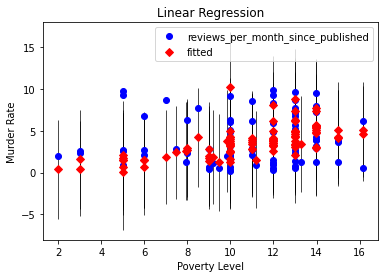

In [233]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(ols_result, 0, ax=ax)
ax.set_ylabel("Murder Rate")
ax.set_xlabel("Poverty Level")
ax.set_title("Linear Regression")
